<a href="https://colab.research.google.com/github/Paoarlett10/Tarea1/blob/main/Tarea1_Ejercicio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tarea1**
**Programación en Python**

*Vazquez Jimenez Arlett Paola / 3201620233*


### **Ejercicio 2.**

Método de Crammer


In [ ]:
import array
import numpy as np

def det(matriz):
  """
  Calcularemos el determiannte de una matriz
  """
  n = len(matriz)
  if n == 1:
    return matriz[0][0]
  if n == 2:
    return matriz[0][0] * matriz[1][1] - matriz[0][1] * matriz[1][0]

  determinante = 0  # Change the variable name to 'determinante'
  for j in range(n):
    matriz_menor = [array.array('f', [matriz[i][k] for k in range(n) if k != j]) for i in range(1,n)]
    determinante += ((-1) **j) * matriz[0][j] * det(matriz_menor)  # Call the function 'det'
  return determinante  # Return the calculated determinant

def Cramer (a,b):
  """
  Resolvamos Ax=B mediante Crammer
  """
  n = len(a)
  det_a = det(a)

  if det_a == 0:
    raise ValueError("El determiante = 0 por lo tanto no tiene solución única")

  sol = []
  for j in range(n):
    a_j = [array.array('f', fila[:]) for fila in a]
    for i in range(n):
        a_j[i][j] = b[0][i]

    det_aj = det(a_j)
    sol.append(det_aj / det_a)
  return sol

In [ ]:
a = np.array([[8, -1, 3, 3],
              [1, 6, 2, 7],
              [4, 9, -2, 6],
              [7, 4, -5, 1]], dtype = float)

b = np.array([[13, 25, 30, 10]], dtype=float)


solucion = Cramer(a, b)

print(f"\nMatriz a:\n {a}")
print(f"\nb:\n {b}")
print(f"\nSolucion:\n {solucion}")



Matriz a:
 [[ 8. -1.  3.  3.]
 [ 1.  6.  2.  7.]
 [ 4.  9. -2.  6.]
 [ 7.  4. -5.  1.]]

b:
 [[13. 25. 30. 10.]]

Solucion:
 [np.float64(1.3149284253578732), np.float64(3.7955010224948875), np.float64(2.7464212678936604), np.float64(-0.65439672801636)]


Obtener los tiempos de ejecución para matrices de tamaño 10 hasta el 100 y graficar

In [ ]:
#Progrma Det

import numpy as np
import timeit


def SubMat(Mat, ren, col):
    """
    Crea una submatriz eliminando un renglón y una columna específicos de la matriz original.
    """
    # Crear una copia de la matriz original para no modificarla
    M1 = np.copy(Mat)

    # Eliminar el renglón especificado
    M1 = np.delete(M1, ren, axis=0)

    # Eliminar la columna especificada
    M1 = np.delete(M1, col, axis=1)

    return M1

def Det(Mat):
    """
    Calcula el determinante de una matriz cuadrada de manera recursiva.
    """
    # Caso base: matriz 2x2
    if Mat.shape[0] == 2 and Mat.shape[1] == 2:
        return Mat[0][0] * Mat[1][1] - (Mat[0][1] * Mat[1][0])

    # Caso recursivo: matrices más grandes
    deter = 0.0
    for col in range(Mat.shape[0]):
        # Calcula el cofactor y suma al determinante
        deter += ((-1) ** col) * Mat[0][col] * Det(SubMat(Mat, 0, col))
    return deter

#Mat = np.array([[6, 1, 1],
#               [4, -2, 5],
 #              [2, 8, 7]])
#
#tiempos_det = timeit.timeit(lambda: Det(Mat), number=1000)
#print(f"Tiempo de ejecución: {tiempos_det:.6f} segundos para 1000 ejecuciones")

In [ ]:
# Programa SolveInv

from numpy import linalg as LA

def Transpuesta(Mat):
    """
    Calcula la transpuesta de una matriz cuadrada modificando la matriz original.
    """
    for ren in range(Mat.shape[0]):
        for col in range(Mat.shape[1]):
            if ren < col:
                # Intercambia los elementos para obtener la transpuesta
                Mat[ren, col], Mat[col, ren] = Mat[col, ren], Mat[ren, col]
    return Mat

def Cofactores(Mat):
    """
    """
    # Crear una matriz de ceros del mismo tamaño que Mat para almacenar los cofactores
    Cofa = np.zeros_like(Mat, dtype=float)

    # Calcular el cofactor para cada elemento de la matriz
    for ren in range(Mat.shape[0]):
        for col in range(Mat.shape[1]):
            # Calcular el determinante de la submatriz (menor) y aplicar el signo
            Cofa[ren, col] = ((-1) ** (ren + col)) * Det(SubMat(Mat, ren, col))
    return Cofa

def Inv(Mat):
    """
    Calcula la inversa de una matriz cuadrada utilizando la matriz de cofactores.
    """
    # Calcular el determinante de la matriz
    deter = Det(Mat)

    # Verificar si la matriz es singular (determinante = 0)
    if deter == 0:
        raise ValueError("La matriz es singular y no tiene inversa.")

    # Calcular la matriz de cofactores
    Cofac = Cofactores(Mat)

    # Transponer la matriz de cofactores para obtener la matriz adjunta
    Cofac = Transpuesta(Cofac)

    # Calcular la inversa multiplicando la adjunta por 1/determinante
    Inversa = (1 / deter) * Cofac

    return Inversa

"""A=np.array([[2,3,-4],[0,-4,2],[1,-1,5]])
b=np.array([1.0,1.0,1.0])"""

import numpy as np

def SolveInv(Mat, vec):
    """
    """
    # Calcular la inversa de la matriz
    InvMat = Inv(Mat)

    # Multiplicar la inversa por el vector de términos independientes
    Solucion = InvMat @ vec

    return Solucion


"""Sol=SolveInv(A,b)
Sol_python=LA.solve(A,b)"""

#tiempos_inv = timeit.timeit(lambda: SolveInv(A, b), number=1000)
#print(f"Tiempo de ejecución: {tiempos_inv:.6f} segundos para 1000 ejecuciones")

'Sol=SolveInv(A,b)\nSol_python=LA.solve(A,b)'

In [ ]:
import numpy as np

def SolverDiagonal(A, b):
    """
    Resuelve un sistema de ecuaciones lineales donde la matriz A es diagonal.
    """
    n = len(A)
    x = np.zeros_like(A, dtype=float)  # Asegura que x sea de tipo flotante
    for i in range(n):
        x[i] = b[i] / A[i]
    return x

"""
AA=np.array([1.0,2.0,3.0])
bb=np.ones_like(AA)

SolverDiagonal(AA,bb)
tiempos_diag = timeit.timeit(lambda: SolverDiagonal(AA,bb), number=1000)
print(f"Tiempo de ejecución: {tiempos_diag:.6f} segundos para 1000 ejecuciones")"""

'\nAA=np.array([1.0,2.0,3.0])\nbb=np.ones_like(AA)\n\nSolverDiagonal(AA,bb)\ntiempos_diag = timeit.timeit(lambda: SolverDiagonal(AA,bb), number=1000)\nprint(f"Tiempo de ejecución: {tiempos_diag:.6f} segundos para 1000 ejecuciones")'

In [ ]:
# SustitucionDelante
import numpy as np

def SustitucionDelante(Mat, b):
    """
    """
    n = Mat.shape[0]
    x = np.zeros(n)

    for i in range(n):
        SumCum = 0.0
        for j in range(i):
            SumCum += Mat[i, j] * x[j]
        x[i] = (b[i] - SumCum) / Mat[i, i]

    return x


import numpy as np

# Crear una matriz cuadrada de ejemplo
#matriz = np.array([[1.0, 2.0, 3.0],
 #                  [4.0, 5.0, 6.0],
  #                 [7.0, 8.0, 9.0]])

# Convertir la matriz en una matriz triangular inferior
MTI = np.tril(matriz)
MTS = np.triu(matriz)

#tiempos_delante = timeit.timeit(lambda: SustitucionDelante(MTI,bb), number=1000)
#print(f"Tiempo de ejecución: {tiempos_delante:.6f} segundos para 1000 ejecuciones")

In [ ]:
#SustitucionAtras
def SustitucionAtras(Mat, b):
    """
    Realiza la sustitución hacia atrás para resolver un sistema de ecuaciones lineales
    representado por una matriz triangular superior.
    """
    n = Mat.shape[0]
    x = np.zeros(n)

    for i in range(n-1, -1, -1):
        SumCum = 0.0
        for j in range(i+1, n):
            SumCum += Mat[i, j] * x[j]
        x[i] = (b[i] - SumCum) / Mat[i, i]

    return x

#tiempos_atras = timeit.timeit(lambda: SustitucionAtras(MTS,bb), number=1000)
#print(f"Tiempo de ejecución: {tiempos_atras:.6f} segundos para 1000 ejecuciones")

In [ ]:
#Algoritmo de Thomas

# Tamaño de la matriz
n = 5

# Crear la diagonal principal
DP=2*np.ones(n)
diagonal_principal = np.diag(DP)

# Crear la diagonal superior
DS=-np.ones(n-1)
diagonal_superior = np.diag(DS, k=1)

# Crear la diagonal inferior
DI=-np.ones(n-1)
diagonal_inferior = np.diag(DI, k=-1)

# Sumar las tres diagonales para obtener la matriz tribanda
matriz_tribanda = diagonal_principal + diagonal_superior + diagonal_inferior


b=np.ones(n)

from scipy.linalg import lu
P, L, U = lu(matriz_tribanda)
U

def Thomas(DP,DS,DI,b):
  n=len(DP)
  x=np.zeros(n)

  for i in range(1,n):
    DP[i]=DP[i]-(DI[i-1]/DP[i-1])*DS[i-1]


  x[-1]=b[-1]/DP[-1]

  for i in range(n-2,-1,-1):
    x[i]=(b[i]-DS[i]*x[i+1])/DP[i]
  return x

 # Thomas(DP,DS,DI,b)

#tiempos_thomas = timeit.timeit(lambda: Thomas(DP,DS,DI,b), number=1000)
#print(f"Tiempo de ejecución: {tiempos_thomas :.6f} segundos para 1000 ejecuciones")

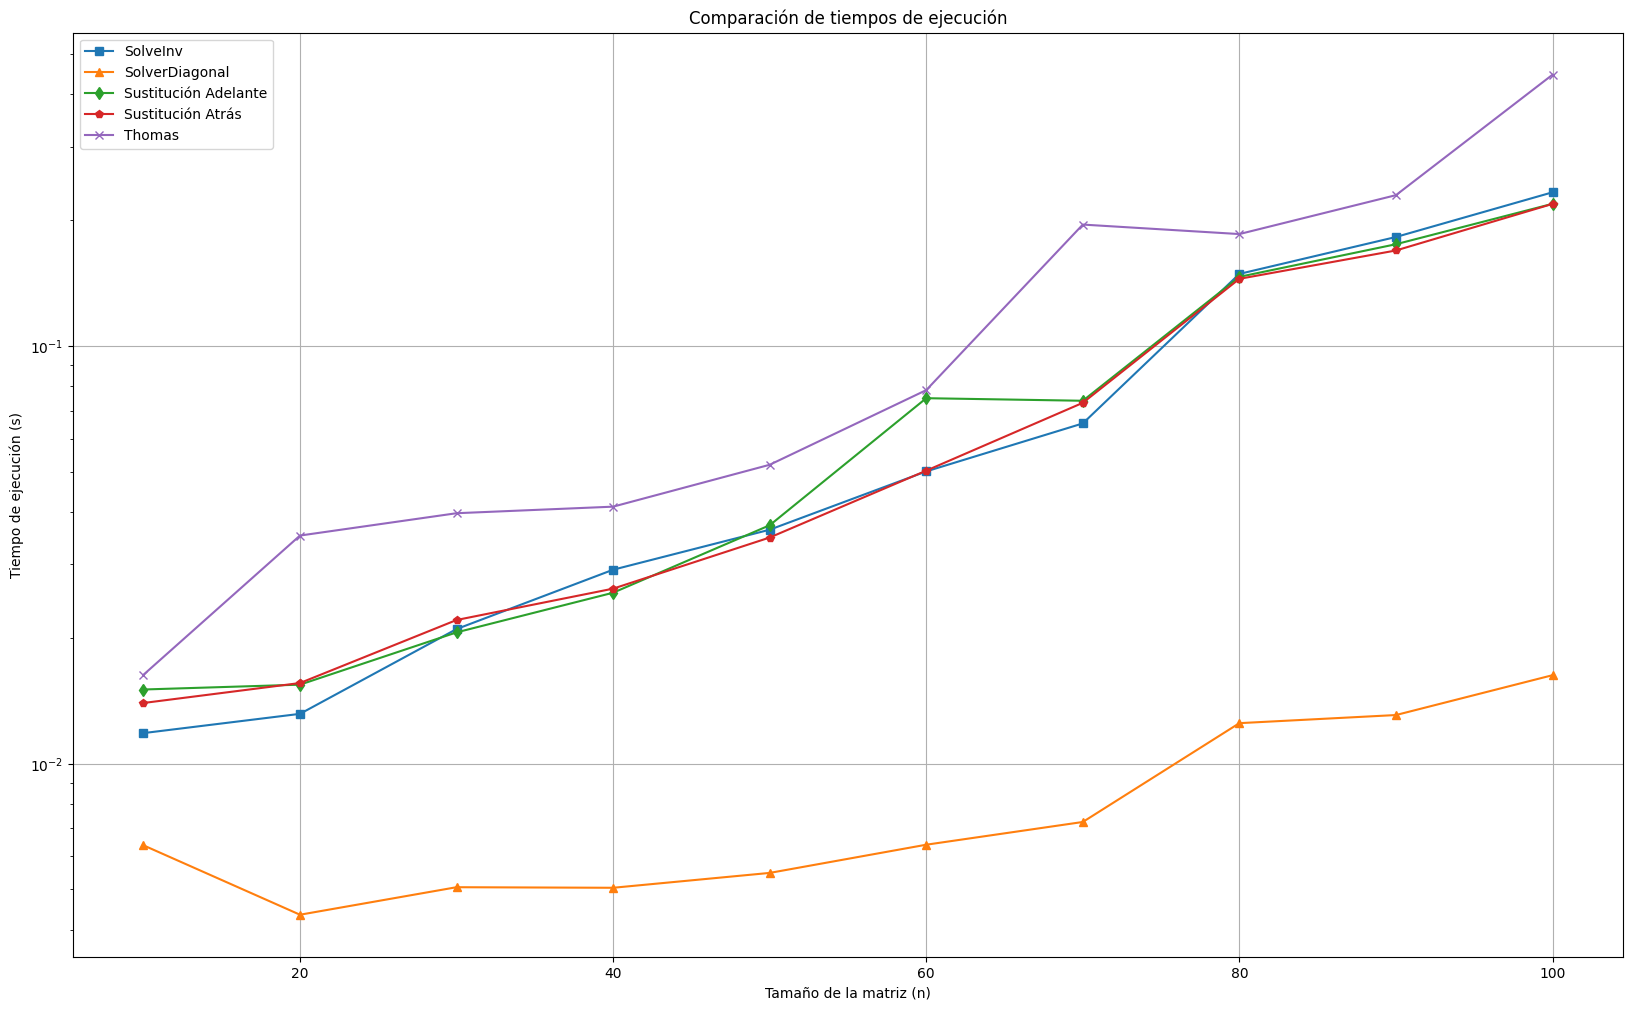

In [ ]:
import timeit
import numpy as np
import matplotlib.pyplot as plt

# Definir tamaños de las matrices
sizes = range(10, 101, 10)

# Listas para tiempos
tiempos_inv = []
tiempos_diag = []
tiempos_delante = []
tiempos_atras = []
tiempos_thomas = []

# Mando a llamar las funciones ya establecidas anteriormente
def SolveInv(A, b):
    return np.linalg.solve(A, b)

def SolverDiagonal(D, b):
    return np.diag(D) @ b

def SustitucionDelante(L, b):
    return np.linalg.solve(L, b)

def SustitucionAtras(U, b):
    return np.linalg.solve(U, b)

def Thomas(DP, DS, DI, b):
    return np.linalg.solve(np.diag(DP) + np.diag(DS, 1) + np.diag(DI, -1), b)

# Iteraramos sobre tamaños de matriz
for n in sizes:
    # Crearremos la matriz tridiagonal A
    DP = 2 * np.ones(n)
    DS = -1 * np.ones(n - 1)
    DI = -1 * np.ones(n - 1)
    A = np.diag(DP) + np.diag(DS, 1) + np.diag(DI, -1)
    b = np.ones(n)

    L = np.tril(A)
    U = np.triu(A)
    D = np.diag(A)

    # Elegir número de repeticiones en función de n
    #num_reps = 1000 if n <= 50 else 1000  # Reducir para matrices grandes

    # Medimos tiempos
    tiempos_inv.append(timeit.timeit(lambda: SolveInv(A, b), number=1000))
    tiempos_diag.append(timeit.timeit(lambda: SolverDiagonal(D, b), number=1000))
    tiempos_delante.append(timeit.timeit(lambda: SustitucionDelante(L, b), number=1000))
    tiempos_atras.append(timeit.timeit(lambda: SustitucionAtras(U, b), number=1000))
    tiempos_thomas.append(timeit.timeit(lambda: Thomas(DP, DS, DI, b), number=1000))

#Graficamos los tiempos de ejecución
plt.figure(figsize=(20, 12))

plt.plot(sizes, tiempos_inv, marker='s', linestyle='-', label="SolveInv")
plt.plot(sizes, tiempos_diag, marker='^', linestyle='-', label="SolverDiagonal")
plt.plot(sizes, tiempos_delante, marker='d', linestyle='-', label="Sustitución Adelante")
plt.plot(sizes, tiempos_atras, marker='p', linestyle='-', label="Sustitución Atrás")
plt.plot(sizes, tiempos_thomas, marker='x', linestyle='-', label="Thomas")

plt.xlabel("Tamaño de la matriz (n)")
plt.ylabel("Tiempo de ejecución (s)")
plt.title("Comparación de tiempos de ejecución")
plt.legend()
plt.grid(True)
plt.yscale("log")  # Usamos escala logarítmica en Y

plt.show()


Sistema de dos bandas

In [5]:
import numpy as np
from numpy import linalg as LA

def triangular_superior(matriz):
    """
    Verifica si una matriz es triangular superior.
    """
    n = len(matriz)
    for i in range(1, n):
        for j in range(0, i):
            if matriz[i][j] != 0:
                return False
    return True

def triangular_inferior(matriz):
    """
    Verifica si una matriz es triangular inferior.
    """
    n = len(matriz)
    for i in range(0, n):
        for j in range(i+1, n):
            if matriz[i][j] != 0:
                return False
    return True

def Thomas_Adelante(DP, DS, DI, b):
    """
    Sistema tridiagonal usando el método de Thomas con sustitución hacia adelante.
    """
    n = len(DP)
    x = np.zeros(n)
    # Eliminar atrás
    for i in range(n - 1, 0, -1):
        DP[i - 1] = DP[i - 1] - (DS[i - 1] / DP[i]) * DI[i - 1]
    # Sustituir
    x[0] = b[0] / DP[0]
    for i in range(1, n):
        x[i] = (b[i] - DI[i - 1] * x[i - 1]) / DP[i]
    return x

def Thomas_Atras(DP, DS, DI, b):
    """
    Sistema tridiagonal usando el método de Thomas con sustitución hacia atrás
    """
    n = len(DP)
    x = np.zeros(n)
    # Eliminación hacia adelante
    for i in range(1, n):
        DP[i] = DP[i] - (DI[i - 1] / DP[i - 1]) * DS[i - 1]
    # Sustitución hacia atrás
    x[-1] = b[-1] / DP[-1]
    for i in range(n - 2, -1, -1):
        x[i] = (b[i] - DS[i] * x[i + 1]) / DP[i]
    return x

def Resolver_Sistema(matriz, b):
    """
    ResOLVER un sistema lineal dependiendo de si la matriz es triangular superior o inferior con Thomas
    """
    n = len(matriz)
    DP = np.diag(matriz).copy()
    DS = np.diag(matriz, k=1).copy()
    DI = np.diag(matriz, k=-1).copy()

    if triangular_superior(matriz):
        print("Sustitución hacia atras - Matriz Triangular Superior.")
        return Thomas_Atras(DP, DS, DI, b)
    elif triangular_inferior(matriz):
        print("Sustitución hacia adelante - Matriz Triangular Inferior.")
        return Thomas_Adelante(DP, DS, DI, b)
    else:
        print("No aplica.")

matriz = np.array([[-5, 0, 0, 0, 0],
                   [2, -5, 0, 0, 0],
                   [0, 2, -5, 0, 0],
                   [0, 0, 2, -5, 0],
                   [0, 0, 0, 2, -5]], dtype=float)

b = np.array([4, 4, 4, 4, 4], dtype=float)

S_thomas = Resolver_Sistema(matriz, b)
print(f"\nSolución por Metodo Thomas:\n {S_thomas}")

S_numpy = LA.solve(matriz, b)
print(f"\nSolución por Numpy:\n {S_numpy}")


Sustitución hacia adelante - Matriz Triangular Inferior.

Solución por Metodo Thomas:
 [-0.8     -1.12    -1.248   -1.2992  -1.31968]

Solución por Numpy:
 [-0.8     -1.12    -1.248   -1.2992  -1.31968]


Modificación del algoritmo de Thomas

In [ ]:
import array

def Thomas_Adelante(DiagP, DSup, DInf, b):
    """
    Algoritmo de Thomas con sustitución hacia adelante
    """
    n = len(DiagP)
    x = array.array('f', [0] * n)  # Vector solución inicializado en ceros

    # Eliminación de coeficientes
    for i in range(n - 1):
        factor = DSup[i] / DiagP[i]
        DiagP[i + 1] -= factor * DInf[i]
        b[i + 1] -= factor * b[i]

    # Sustitución hacia adelante
    x[0] = b[0] / DiagP[0]
    for i in range(1, n):
        x[i] = (b[i] - DInf[i - 1] * x[i - 1]) / DiagP[i]

    return x

n = 5
DiagP = array.array('f', [2] * n)  # Diagonal principal
DSup = array.array('f', [-3] * (n - 1))  # Diagonal superior
DInf = array.array('f', [4] * (n - 1))  # Diagonal inferior
b = array.array('f', [5] * n)  # Vector independiente

# Crear matriz
matrizA = array.array('f', [0] * (n * n))
for i in range(n):
    matrizA[i * n + i] = DiagP[i]  # Diagonal principal
for i in range(n - 1):
    matrizA[i * n + (i + 1)] = DSup[i]  # Diagonal superior
    matrizA[(i + 1) * n + i] = DInf[i]  # Para diagonal inferior,

# Mostrar la matriz
print("Matriz A:")
imprimir_matriz(matrizA, n)

#matriz_tribanda = DiagP+DSup+DInf
#print(f"\nMatriz_tribanda:\n {matriz_tribanda}")

print(f"\nVectror Indep:\n {b}")

# Aplicar algoritmo de Thomas modificado
solucion = Thomas_Adelante(DiagP, DSup, DInf, b)
print(f"\nSolución:\n {solucion}")


Matriz A:
  2.00  -3.00   0.00   0.00   0.00
  4.00   2.00  -3.00   0.00   0.00
  0.00   4.00   2.00  -3.00   0.00
  0.00   0.00   4.00   2.00  -3.00
  0.00   0.00   0.00   4.00   2.00


Matriz_tribanda:
 array('f', [2.0, 2.0, 2.0, 2.0, 2.0, -3.0, -3.0, -3.0, -3.0, 4.0, 4.0, 4.0, 4.0])

Vectror Indep:
 array('f', [5.0, 5.0, 5.0, 5.0, 5.0])

Solución:
 array('f', [2.5, 0.3125, 2.4107143878936768, 0.6743420958518982, 2.29296875])
